In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("C:/Users/shreya sureka/Downloads/Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#To know, How many values available in object('categorical') type of features And Return Categorical values with Count
def explore_object_type(df ,feature_name):
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [9]:
for featureName in df.columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"type's" Values with count are :
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

"nameOrig's" Values with count are :
C1530544995    3
C1784010646    3
C1065307291    3
C2098525306    3
C1902386530    3
              ..
C1114199549    1
C148240442     1
C1845321017    1
C1215554664    1
C1250963902    1
Name: nameOrig, Length: 6353307, dtype: int64

"nameDest's" Values with count are :
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M461358197       1
M122431892       1
M293498984       1
M140393179       1
M512356101       1
Name: nameDest, Length: 2722362, dtype: int64


In [10]:
df.apply(lambda x: sum(x.isnull()),axis=0)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### There are no null values 

<AxesSubplot:xlabel='amount'>

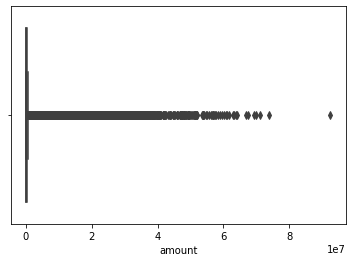

In [11]:
sns.boxplot(x=df["amount"])

In [12]:
print("Total Unique Values in nameOrig", df['nameOrig'].nunique())

Total Unique Values in nameOrig 6353307


In [13]:
print("Total Unique Values in nameDest", df['nameDest'].nunique())

Total Unique Values in nameDest 2722362


#### Amount column has outliers, we are checking for amount column because our concrn is transfer more than 200.000 in a single transaction is illegal attempt
#### Debit has the lowest count 
#### Unique values of both nameorig and namedest 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_without_text=pd.DataFrame({"step":df.step,
                                "amount":df.amount,
                               "oldbalanceOrg":df.oldbalanceOrg,
                               "newbalanceOrig":df.newbalanceOrig,
                               "oldbalanceDest":df.oldbalanceDest,
                               "newbalanceDest":df.newbalanceDest,
                               "isFraud":df.isFraud,
                               "isFlaggedFraud":df.isFlaggedFraud})
vif_data = pd.DataFrame()
vif_data["feature"] = data_without_text.columns
  
vif_data["VIF"] = [variance_inflation_factor(data_without_text.values, i)
                          for i in range(len(data_without_text.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


#### oldbalanceorg , newbalanceorg , oldbalancedest and newbalancedest are highly correlated 

In [15]:
from tqdm import tqdm

In [16]:
old_balance=df["oldbalanceOrg"]
new_balance=df["newbalanceOrig"]
bal_change=[] #if balace deduct then 1 else 0
for i in tqdm(range(len(old_balance))):
  diff=new_balance[i]-old_balance[i]
  if diff>0:
      bal_change.append(0)
  else:
      bal_change.append(1)

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:43<00:00, 147354.37it/s]


In [17]:
dest_old=df["oldbalanceDest"]
dest_new=df["newbalanceDest"]
dest_bal_change=[]
dest_bal=[]
for i in tqdm(range(len(dest_old))):
    diff=dest_new[i]-dest_old[i]
    if diff>0:
        dest_bal_change.append(0)
        dest_bal.append(abs(diff))
    else:
        dest_bal_change.append(1)
        dest_bal.append(abs(diff))

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:43<00:00, 147111.24it/s]


In [18]:
df["source_bal_change"]=bal_change
df["destination"]=dest_bal
df["dest_bal_chnage"]=dest_bal_change

In [19]:
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [20]:
df.head(2)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,1,0.0,1
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,1,0.0,1


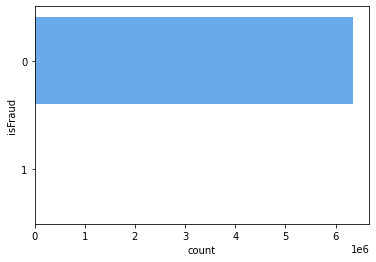

In [21]:
sns.countplot(y = df['isFraud'], palette='cool');

#### Target variable is highly unbalanced 

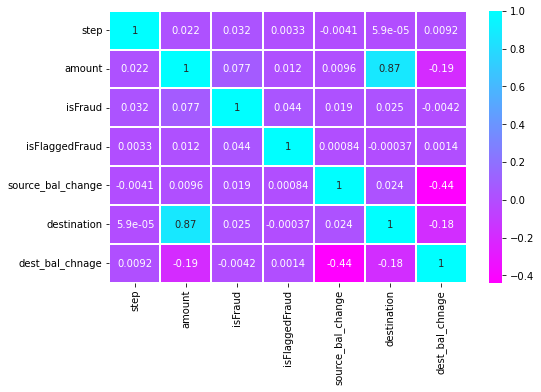

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='cool_r', linewidth=0.2, annot=True);

####  From our correlation chart we can make some observations:

#### There is a very strong correlation between the opening and ending balance information of source and destination customer accounts. Which was to be expected. Maybe this information is redundant in our model (oldbalanceOrg/newbalanceOrig and oldbalanceDest/newbalanceDest)
#### There is a certain negative correlation between the recipient being a merchant and fraud. It's not very significant, but apparently scams are usually done through regular customer accounts.
##### After all the data analysis, we will return with the values ​​0 in 'oldbalanceDest' and 'newbalanceDest' in our balanced df so that we can create the machine learning model.

<AxesSubplot:xlabel='step', ylabel='Density'>

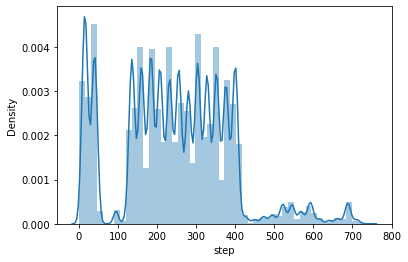

In [23]:
sns.distplot(df['step'])

<AxesSubplot:xlabel='amount', ylabel='Density'>

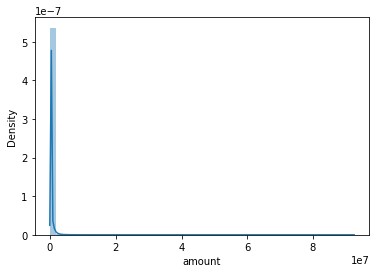

In [24]:
sns.distplot(df['amount'])

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

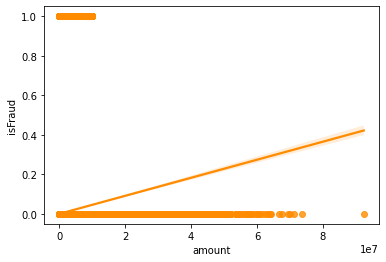

In [25]:
sns.regplot(df['amount'],df['isFraud'],color='darkorange')

#### As the amount increases fraud increases

In [26]:
## checking colinearity 
result=df["isFraud"]
df.drop("isFraud",axis=1,inplace=True)

In [27]:
True_fraud=np.sum(result==1)
False_fraud=np.sum(result==0)
print(True_fraud)
print(False_fraud)

8213
6354407


#### The data is imbalanced 

In [65]:
from imblearn.under_sampling import RandomUnderSampler  
#Doing Under sampling to make data balance
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(df,result)

In [66]:
True_fraud=np.sum(y_res==1)
False_fraud=np.sum(y_res==0)
print(True_fraud)
print(False_fraud)

8213
8213


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [68]:
from sklearn import preprocessing 

In [69]:
l1 = preprocessing.LabelEncoder()
l1.fit(df["type"])
train_type=l1.transform(x_train["type"])
test_type=l1.transform(x_test["type"])

In [70]:
le2=preprocessing.LabelEncoder()
le2.fit(df["nameOrig"])
train_nameOrig=le2.transform(x_train["nameOrig"])
test_nameOrig=le2.transform(x_test["nameOrig"])

In [71]:
le3=preprocessing.LabelEncoder()
le3.fit(df["nameDest"])
train_nameDest=le3.transform(x_train["nameDest"])
test_nameDest=le3.transform(x_test["nameDest"])

In [72]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [73]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [74]:
x_train.head(2)

,step,amount,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type,nameOrig,nameDest
7332,350,23097.10,0,1,0.0,1,3,4550749,2514041
3016,479,55826.71,0,1,55826.7,0,1,5389684,393759


In [75]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [76]:
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [77]:
x_test.head(2)

,step,amount,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type,nameOrig,nameDest
13724,496,766151.45,0,1,0.0,1,4,3333219,404242
12284,365,31315.51,0,1,0.0,1,4,572050,74707


#### Using Classification Models 

In [78]:
!pip install xgboost
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [64]:
!pip install optuna 
!pip install catboost
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import optuna
import xgboost as xgb
import catboost as catb

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

Best Parameter {'max_depth': 4}


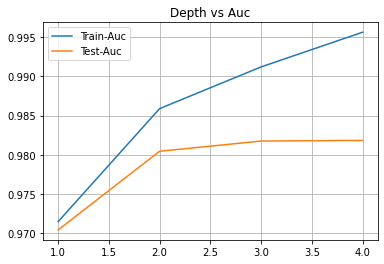

In [86]:
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

In [100]:


model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [88]:
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [89]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

the maximum value of tpr*(1-fpr) 0.9215321053716282 for threshold 0.382
Train confusion matrix
[[6328  236]
 [ 290 6286]]


In [96]:
model_set.score(x_train, y_train)

0.9576103500761035

In [98]:
catb_model = catb.CatBoostClassifier(verbose=0)
catb_model.fit(x_train, y_train)

In [99]:
catb_model.score(x_train, y_train)

0.9552511415525115

#### XGBOOST has higher accuracy therefore we will use xgboost 

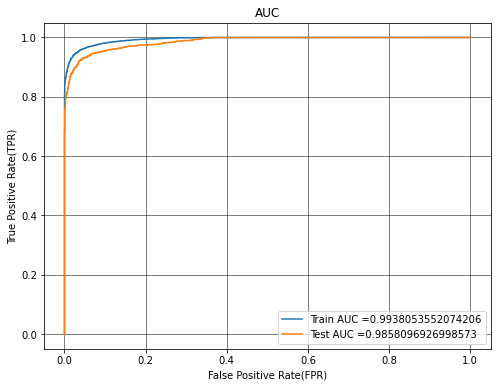

In [102]:
from sklearn.metrics import roc_curve, auc
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [103]:
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [104]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

the maximum value of tpr*(1-fpr) 0.9215321053716282 for threshold 0.382
Train confusion matrix
[[6328  236]
 [ 290 6286]]


<AxesSubplot:title={'center':'Train data '}>

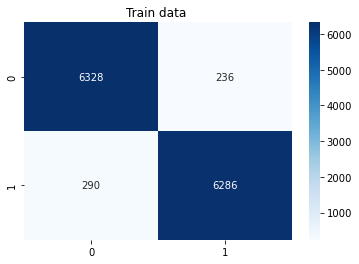

In [105]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [106]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

the maximum value of tpr*(1-fpr) 0.8885698483336933 for threshold 0.475
Test confusion matrix
[[1577   72]
 [ 116 1521]]


<AxesSubplot:title={'center':'Test data '}>

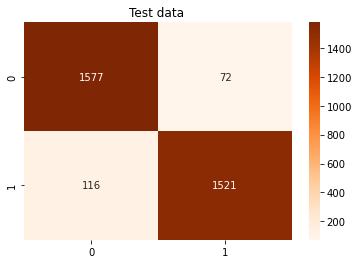

In [107]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

In [ ]:
#### Fraud is occuring when amount is larger, Limiting the tranfering amount can decrease in the number of fraud cases 